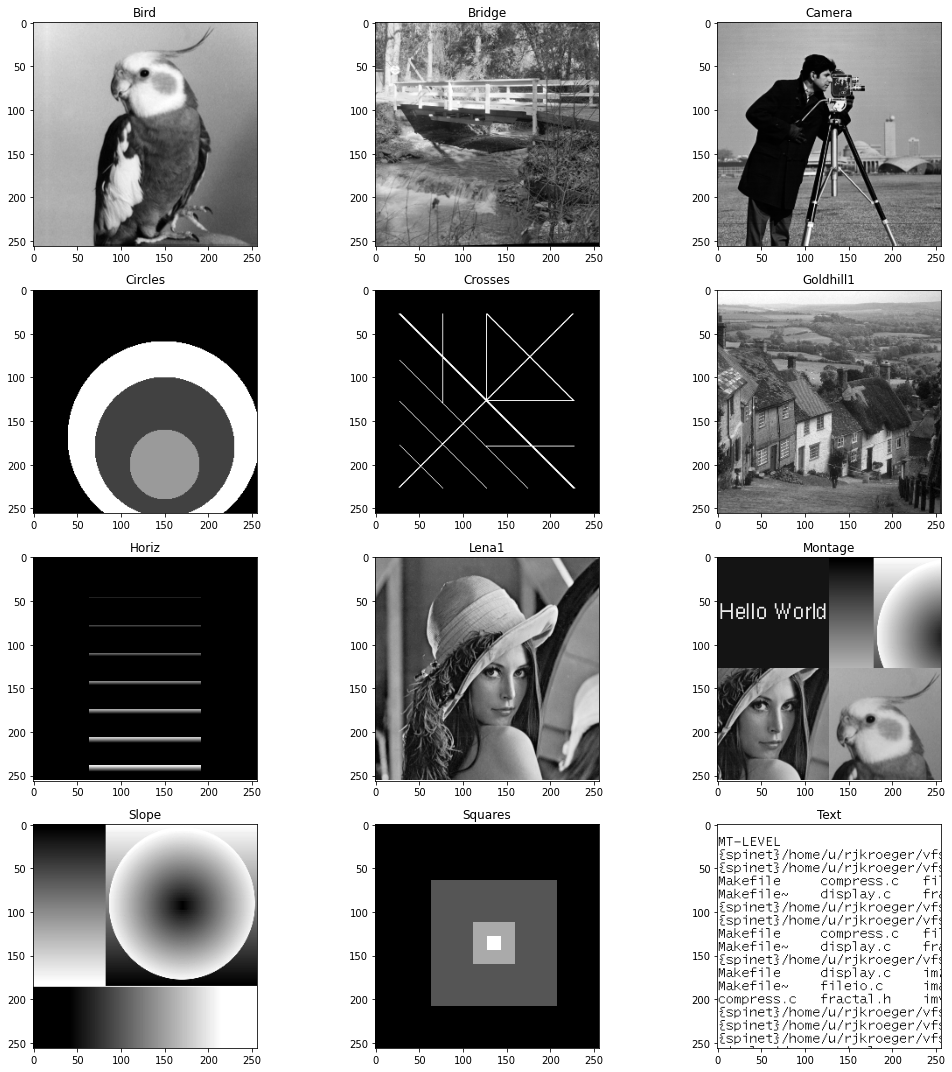

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    ax[imInd // 3, imInd % 3].imshow(np.array(im), cmap='gray')
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()




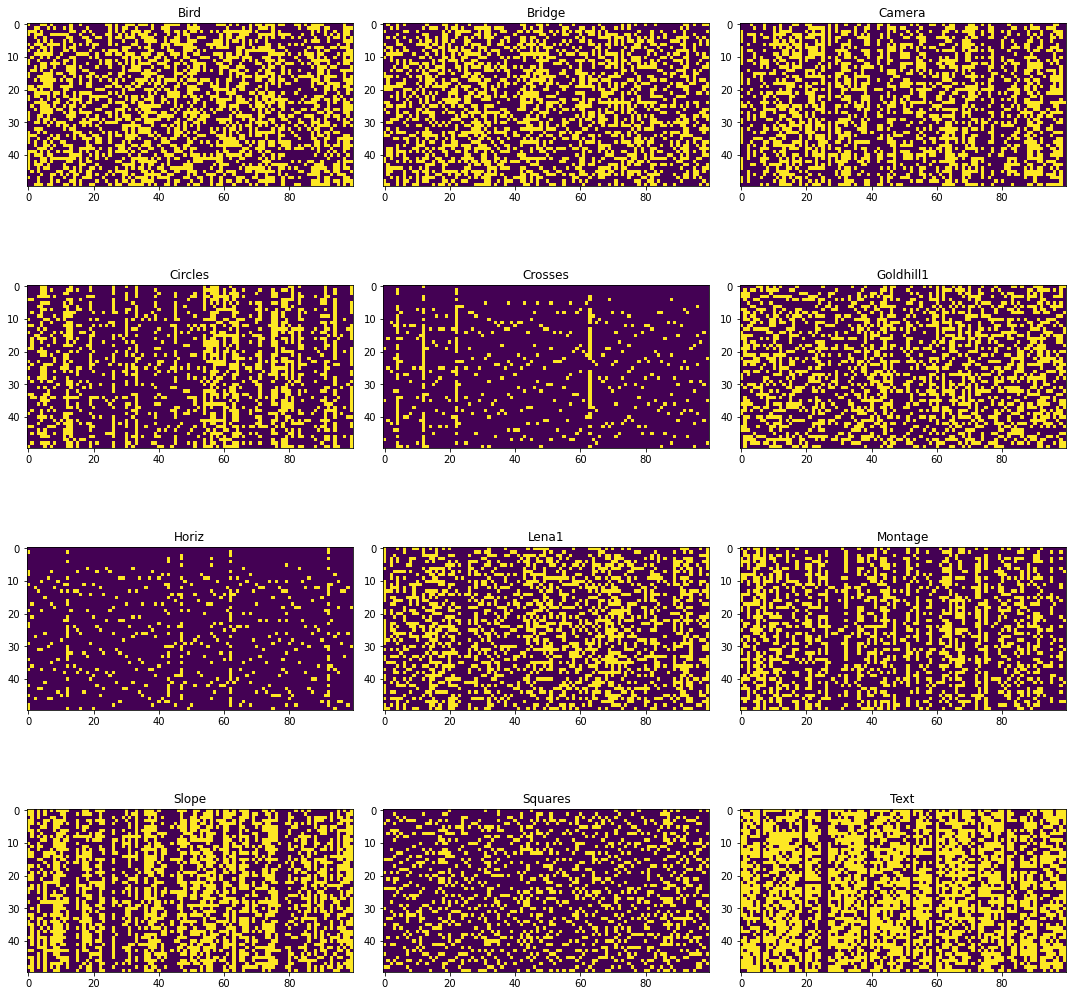

In [3]:
import torch
from encoding import TTFSEncoder, PoissonEncoder, PositionalEncoder
# image_size = 20
# encoder = NumericEncoder(7, image_size, std=10, padding=10)
# data = torch.tensor([[200, 50, 3, 44, 180],
#                      [40, 150, 32, 4, 80],
#                      [45, 40, 120, 100, 10],])

# print('pooled: ', encoder.pool(data, image_size, 'avg'))
# encoded = encoder(data)

# print(len(encoded), encoded)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

encoder = PoissonEncoder(50, 100)

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    
    encoded = encoder(data=np.array(im), pooling='random')
    # print(encoded)

    ax[imInd // 3, imInd % 3].imshow(encoded)
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()



1100xBatch: 1/1 (100%) 3351.336ms


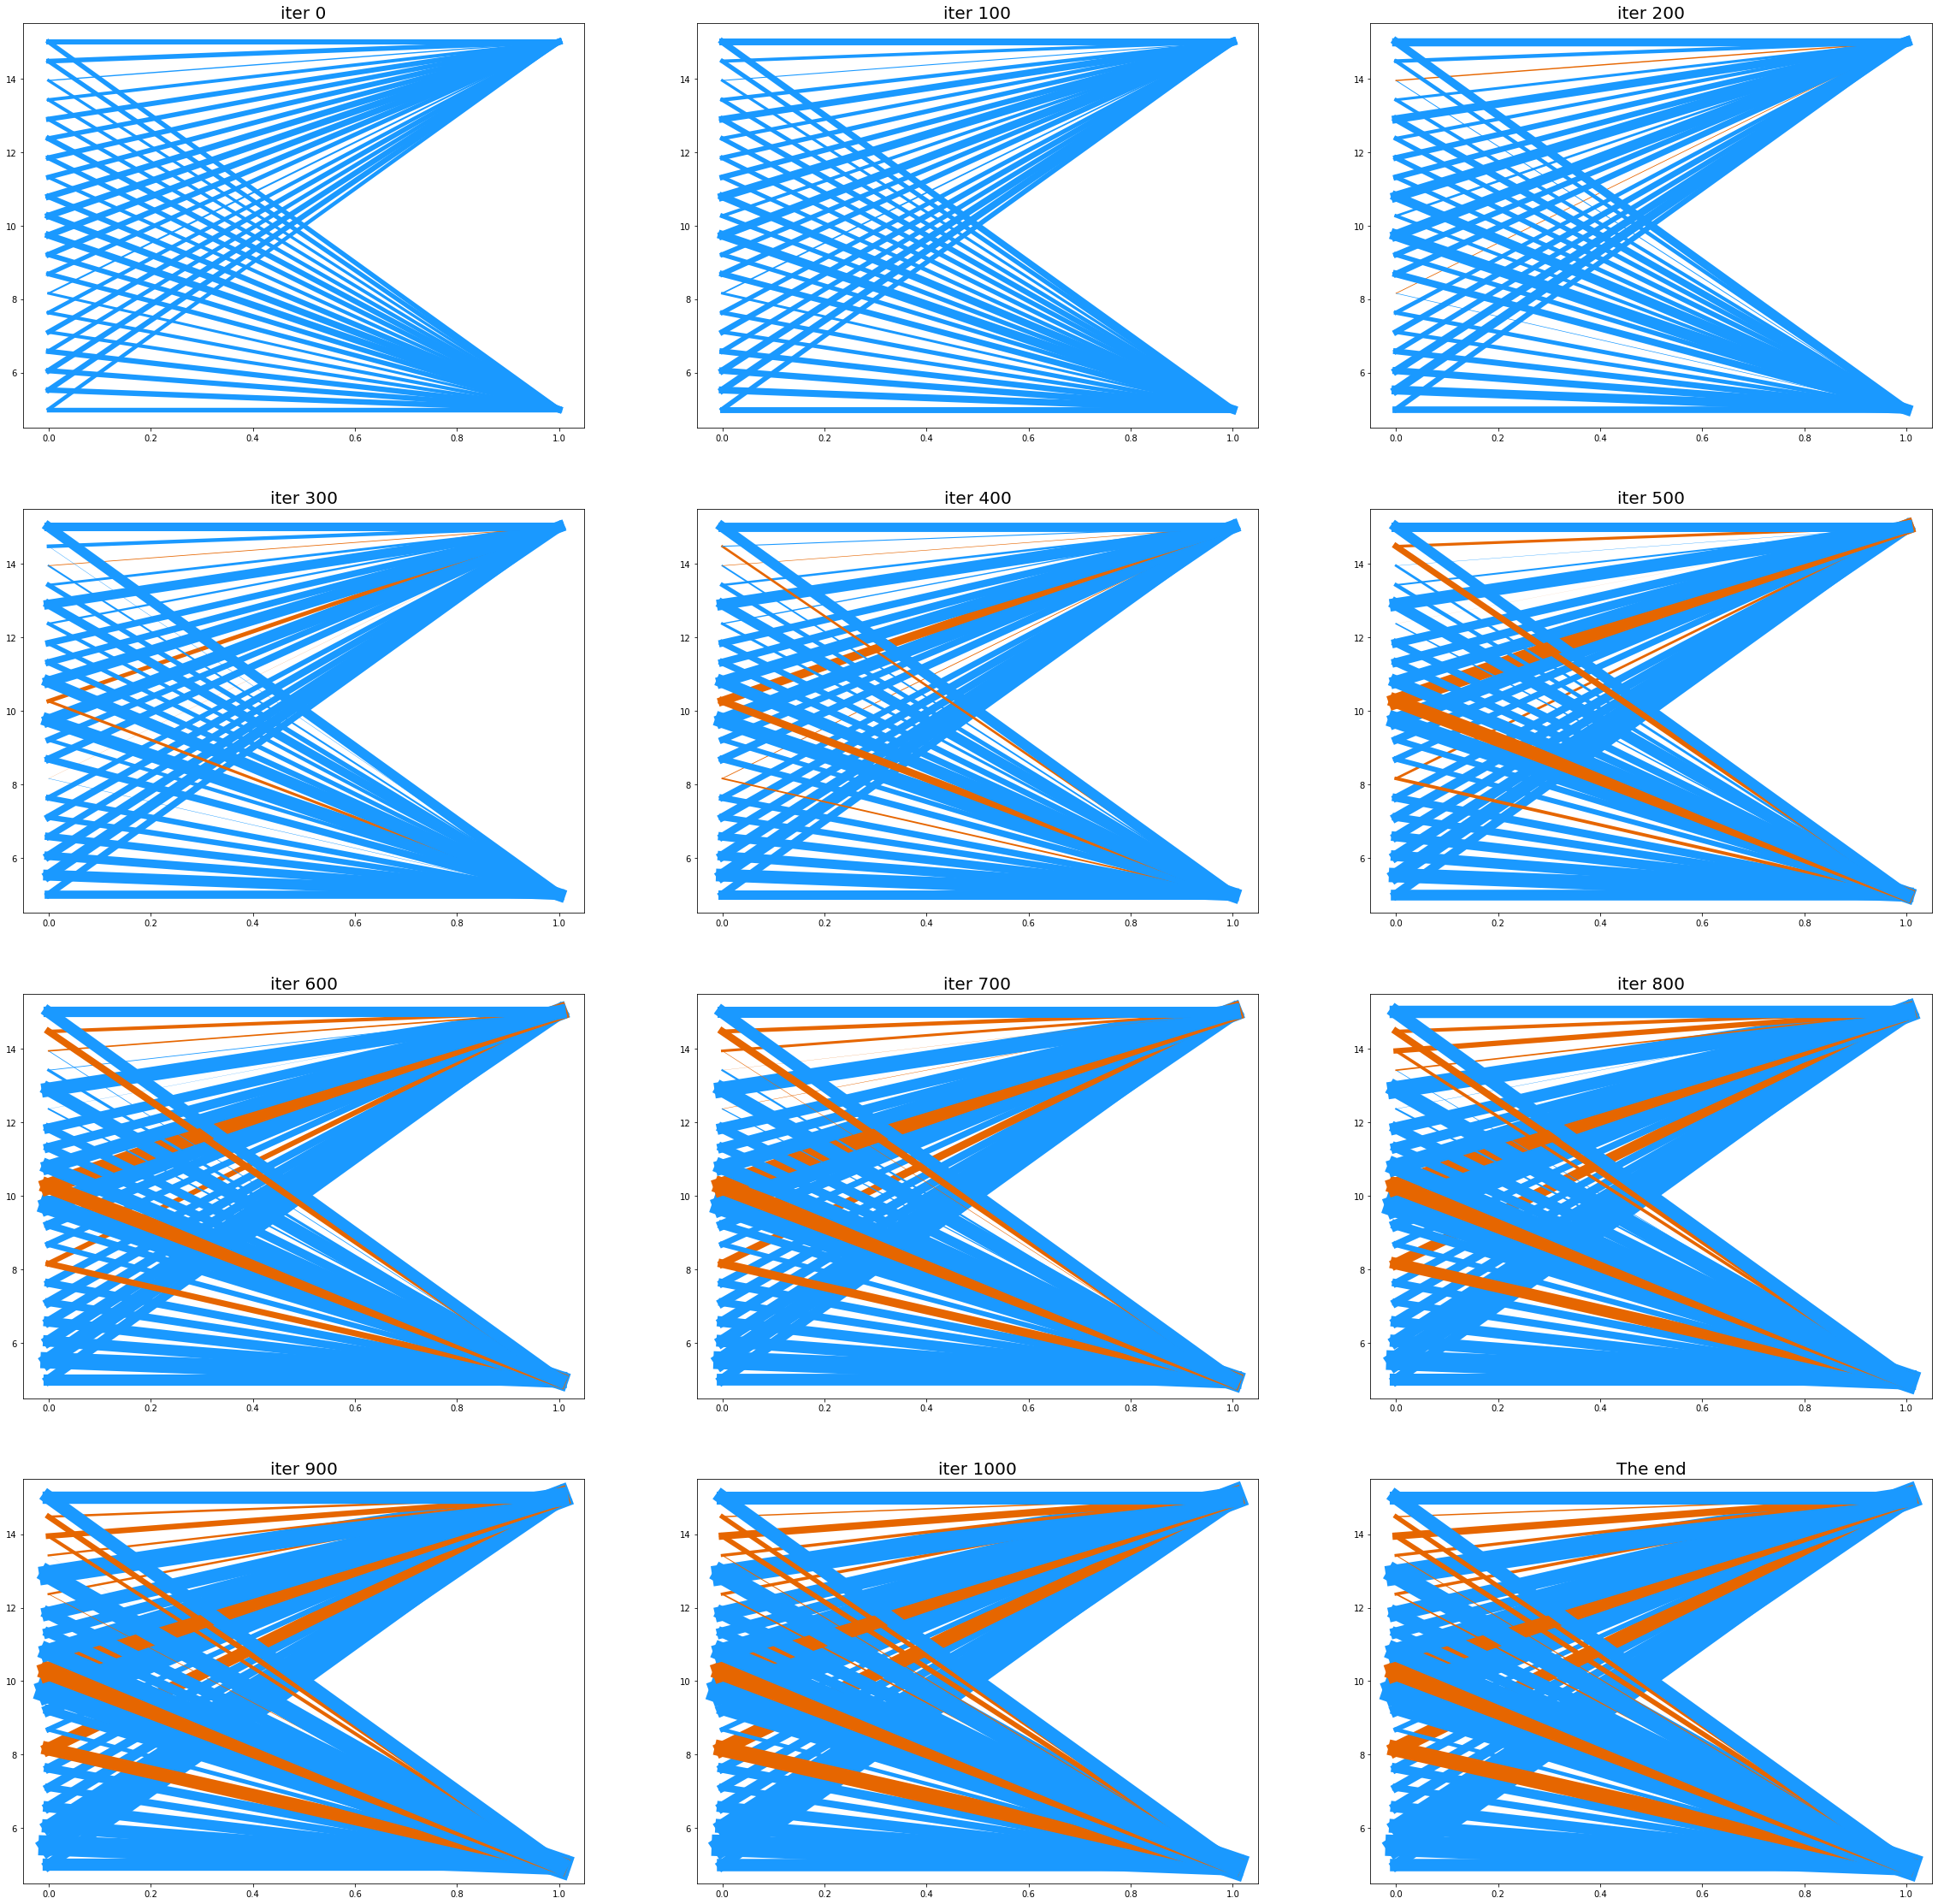

torch.Size([3765, 2])
torch.Size([842, 2])
Weights:
N1 & N2 & diff \\
145.38 & 124.66 & 20.73\\
250.21 & 240.27 & 9.93\\
162.4 & 162.25 & 0.15\\
128.62 & 121.34 & 7.28\\
81.73 & 98.55 & -16.82\\
108.92 & 102.78 & 6.14\\
-182.97 & -171.14 & -11.83\\
45.12 & 57.63 & -12.51\\
117.58 & 136.86 & -19.28\\
310.57 & 292.95 & 17.62\\
-214.66 & -230.42 & 15.76\\
216.45 & 211.41 & 5.04\\
114.48 & 126.6 & -12.12\\
156.61 & 173.28 & -16.68\\
-17.99 & -36.02 & 18.03\\
224.35 & 237.96 & -13.61\\
-10.43 & -35.43 & 24.99\\
-58.66 & -84.57 & 25.91\\
-54.57 & -14.84 & -39.74\\
162.69 & 150.6 & 12.09\\
similarity: 0.9939497709274292


In [15]:
# from experiment import learnSTDP
from stdp import STDP
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from metrics import weights_similarity

im1 = np.array(Image.open(f'images/crosses.tif'))
im2 = np.array(Image.open(f'images/lena1.tif'))
model = STDP(syn_params={'w_mean': 50, 'flat': True, 'trace_dur': 10}, N=20, fix_image=True)

result = model.learn(im1, im2, intersection=1, image_dur=15, image_sleep=5, iters=1100, inp_amp=500, verbose=0, encoding='poisson', W_changes_step=100)
plt.show()
print(model.ng_inp['spike', 0].shape)
print(model.ng_out['spike', 0].shape)

# Similarity
print("\33[1mWeights:")
print("N1 & N2 & diff \\\\")
for i in range(model.syn.W.shape[0]):
    print(f"{round(model.syn.W[i, 0].item(), 2)} & {round(model.syn.W[i, 1].item(), 2)} & {round((model.syn.W[i, 0] - model.syn.W[i, 1]).item(), 2)}\\\\")
print(f"similarity: {weights_similarity(model.syn.W)}")


20xBatch: 1/1 (100%) 438.545ms


Text(0.5, 1.0, 'Image 0')

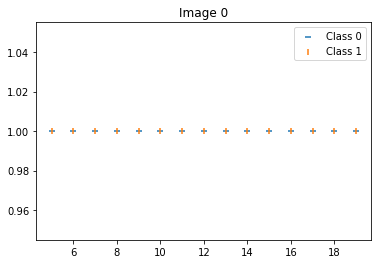

In [4]:
import torch
image, ng_inp, ng_out = model.test()
zeros = ng_out['spike', 0][:, 1] == 0
plt.scatter(x=ng_out['spike', 0][zeros][:, 0], y=torch.ones(zeros.sum()), marker='_')
plt.scatter(x=ng_out['spike', 0][~zeros][:, 0], y=torch.ones((~zeros).sum()), marker='|')
plt.legend(['Class 0', 'Class 1'])
plt.title(f"Image {image}")


In [4]:
print(model.syn.W)


tensor([[429.7715, 434.1519],
        [487.9525, 476.0580],
        [283.6324, 272.4270],
        [210.3915, 218.2140],
        [376.4672, 380.1046],
        [261.0876, 259.5616],
        [ 81.2576,  67.1347],
        [264.3126, 272.4344],
        [310.8741, 308.9597],
        [360.3086, 374.5992],
        [325.8840, 327.9547],
        [207.5285, 223.0062],
        [387.4104, 388.9249],
        [465.7475, 474.7499],
        [210.5578, 214.0237],
        [182.8496, 185.0461],
        [348.1588, 341.4125],
        [421.7061, 430.4038],
        [303.5129, 317.4033],
        [179.6666, 173.3430]])
